In [6]:
import math

def num_people(num_bosses, f=7):
    return (f**(num_bosses+1) -1)/(f-1)

def num_bosses(num_people, f=7):
    return math.floor(math.log((f-1)*num_people, f))

def inty(s):
    return int(s.replace(',', ''))


# Intro

With wealth inequality rising [e.g. 1] questions are raised such as 'what can we do about it?' or even 'should we do anything about it?'. The problem perhaps lies more in capital gains, inheritance, the financial system and its interface to government etc., than in the salaries of employees. However, the media readily publishes stories about high executive salaries [2] to the shock of the general public. At the moment, in most places, the market more or less decides compensation for work done or 'things produced' but it can be difficult for ordinary people to digest how much more money some executives earn and why.

Here is one entertaining way of looking at salaries. Imagine a society that is integrated into one single hierarchy. The workers on minimum wage are at the bottom in teams of a given size. For every team there is a worker at the next level up - you can think of them as a manager if you want. The managers are also grouped into teams of the same size and they in turn report to someone. (for technical people we are talking about a tree of degree n). Each 'manager' gets paid some multiple of their subordinates wage e.g. 1.3 times. This continues on up the tree to The Boss who has no manager. The thought experiment is simply - what would the Boss's salary be in such a hierarchy for a given minimum wage, team size and population of workers? (See below for an example diagram of work hierarchy).

The mathematics of this model is not very complicated but I suspect that intuition for what the big-boss should earn given such simple rules is not good - mine wasn't. This is likely because although the salary does grow exponentially up the hierarchy (like compound interest), the width of the hierarchy shrinks even faster. Below are presented some examples and interactive charts to explore the relationship between the size of teams, 'manager multiplier' and boss multiplier.

[1] https://www.theguardian.com/commentisfree/2018/apr/12/wealth-inequality-reasons-richest-global-gap]

[2] https://www.forbes.com/sites/markmurphy/2019/04/23/abigail-disney-is-right-insane-ceo-compensation-can-have-a-corrosive-effect-on-society/

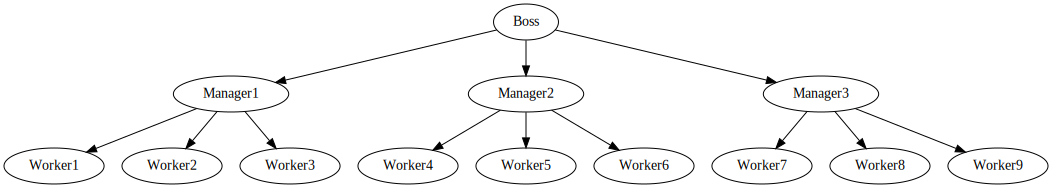

In [4]:
import graphviz


g = graphviz.Digraph()
g.edge('Boss', 'Manager1')
g.edge('Boss', 'Manager2')
g.edge('Boss', 'Manager3')
g.edge('Manager1', 'Worker1')
g.edge('Manager1', 'Worker2')
g.edge('Manager1', 'Worker3')
g.edge('Manager2', 'Worker4')
g.edge('Manager2', 'Worker5')
g.edge('Manager2', 'Worker6')
g.edge('Manager3', 'Worker7')
g.edge('Manager3', 'Worker8')
g.edge('Manager3', 'Worker9')
g

In [5]:
from IPython.display import Markdown as md

number_workers = 125200 * (1/0.05)
number_mng_levels = num_bosses(number_workers, 5)
max_salary_rel = 1.3**number_mng_levels
minimum_wage = 10.20
max_hourly = minimum_wage * max_salary_rel
max_annual = 40 * 52 * max_hourly

us_workers = 200000000
us_bosses = num_bosses(us_workers, 5)
china_workers = 1000000000
china_bosses = num_bosses(china_workers, 5)
disney_workers = 200000
disney_bosses = num_bosses(disney_workers, 5)
disney_bosses_10 = num_bosses(disney_workers, 5)
mult = 1.3
disney_mult = 2.72

text = f"""
# Examples

In Ireland the number of workers is about {number_workers:,.0f}.

The number of management levels in a hierarchy containing all {number_workers:,.0f} workers where each team 
has 5 employees would be {number_mng_levels}.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be {max_salary_rel:,.0f} times greater.

The minimum wage is 10.20 Euros, therefore the max hourly wage for a CEO would be {max_hourly:,.2f} and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = {max_annual:,.0f} (discounting that
most CEOs would work more hours than this).

Below the calculation is repeated for worker population sizes roughly equivalent to the USA, China 
and Disney corporation.


|  | Ireland | US | China | Disney | Disney for `$`65M |
| --- | --- | --- | --- | --- | --- |
| # workers                           | \
{number_workers:,.0f} |\
{us_workers:,.0f} |\
{china_workers:,.0f} |\
{disney_workers:,.0f} | \
{disney_workers:,.0f} | 
| # management levels with teams of 5 | \
{num_bosses(number_workers, 5)} | \
{us_bosses}       | \
{china_bosses}       | \
{disney_bosses} |\
{disney_bosses} |
| minimum wage                        | \
`$`{minimum_wage}               | \
`$`{minimum_wage} | \
`$`{minimum_wage}| \
`$`{minimum_wage}|\
`$`{minimum_wage}|
| boss multiplier                        | \
`$`{mult}               | \
`$`{mult} | \
`$`{mult}| \
`$`{mult}|\
`$`{disney_mult}|
| Boss hourly wage                    | \
`$`{max_hourly:,.0f}            | \
`$`{minimum_wage* (mult**us_bosses):,.0f} | \
`$`{minimum_wage* (mult**china_bosses):,.0f} | \
`$`{minimum_wage* (mult**disney_bosses):,.0f} |\
`$`{minimum_wage* (disney_mult**disney_bosses):,.0f} |
| Boss annual salary (40 hrs a week)  | \
`$`{max_annual:,.0f}            | \
`$`{minimum_wage* (mult**us_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (mult**china_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (mult**disney_bosses)*40*52:,.0f} | \
`$`{minimum_wage* (disney_mult**disney_bosses)*40*52:,.0f} |


Compare those outcomes with real-world Disney [2] where CEO Bob Iger’s 2019 compensation was `$` 65.6 Million in a 
company of 200,000 and a minimum wage of less than `$` 11. Iger's hourly rate for a 40hr week was equivalent
to about '$'30,000!

The final column of the table above includes details of a scenario where we set the manager multiplier for Disney
 so that the in our calculation the CEO salary is approximately correct. The required
multiplier for being a manager would be around {disney_mult}. That means that if you were a manager of a 
concession stand or shop with a staff of 5 (those staff on the minimum wage of `$`10.2.) you would earn 
{10.2*disney_mult:,.2f} an hour or {10.2*52*40*disney_mult:,.0f} a year. Their boss in turn would 
earn {10.2*52*40*disney_mult**2:,.0f}

Below in the interactive charts you can set a value for team size and/or manager multiplier and see what
the boss of such a scenario would earn under the stated rules.

"""

md(text)



NameError: name 'num_bosses' is not defined

# Interactive Chart 1

Below you can see a chart of how the Boss Salary changes with the multiplier. There is a slider below the chart that allows you to adjust the team-size that is used to generate the chart interactively.

In [5]:

%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


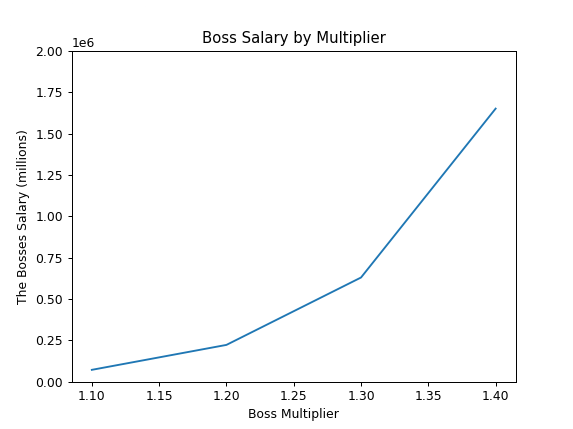

interactive(children=(IntSlider(value=3, description='team_size', max=10, min=3), Output()), _dom_classes=('wi…

In [6]:
def calc_salaries_with_team_size(team_size):
    return [40*52*10*(n**num_bosses(1000000, team_size)) for n in x_s]


fig_by_multiplier = plt.figure()
ax_by_multiplier = fig_by_multiplier.add_subplot(ylim=(0,2000794), title="Boss Salary by Multiplier", xlabel='Boss Multiplier', ylabel='The Bosses Salary (millions)')
x_s = [x/10 for x in range(11,15)]
y_s = calc_salaries_with_team_size(3)
line, = ax_by_multiplier.plot(x_s, y_s)


def update_team_size(team_size = 3):
    new_y_s = calc_salaries_with_team_size(team_size)
    line.set_ydata(new_y_s)
    fig_by_multiplier.canvas.draw_idle()

i0 = interact(update_team_size, team_size=(3, 10, 1))


# Interactive Chart 2

Below you can see a chart of how the Boss Salary changes with team-size. There is a slider below the chart that allows you to adjust the multipler that is used to generate the chart interactively.

<IPython.core.display.Javascript object>


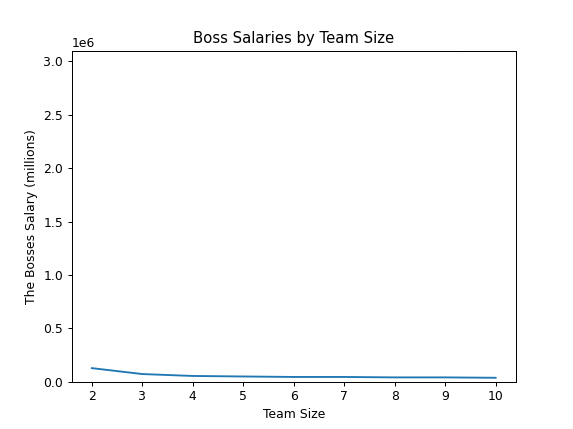

interactive(children=(FloatSlider(value=1.1, description='boss_multiplier', max=1.3, min=1.1, step=0.02), Outp…

In [7]:

def calc_salaries(boss_multiplier):
    return [40*52*10*(boss_multiplier**num_bosses(1000000, n)) for n in x_s]


fig_by_team_size = plt.figure()
ax_by_team_size = fig_by_team_size.add_subplot(ylim=(0,3100794), title="Boss Salaries by Team Size", xlabel='Team Size', ylabel='The Bosses Salary (millions)')
x_s = [x for x in range(2,11)]
y_s = calc_salaries(1.1)

line, = ax_by_team_size.plot(x_s, y_s)


def update_multiplier(boss_multiplier = 1.1):
    new_y_s = calc_salaries(boss_multiplier)
    line.set_ydata(new_y_s)
    fig_by_team_size.canvas.draw_idle()

i1 = interact(update_multiplier, boss_multiplier=(1.1, 1.3, 0.02))

# Tabulating Boss Salaries

Below find a table that lists boss salaries by 
- team size (3 to 9) in the rows
- 'boss multiplier' (how much more a boss earns that their subordinates - 1.1 to 1.9) in the columns

There are sliders to set the variables for the minimum wage and total population which, when moved, will change the values in the table accordingly.

In [8]:
import pandas as pd


pd.set_option('display.float_format', lambda x: '${:,.0f}'.format(x))


@interact(min_wage=(5, 20), population=(100000, 1000000, 100000))
def table(min_wage, population):
    result = []
    for i, team_size in enumerate(range(3, 10)):
        vals = []
        for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
            vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
        result.append(vals)
    return pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

interactive(children=(IntSlider(value=12, description='min_wage', max=20, min=5), IntSlider(value=500000, desc…

In [136]:
from functools import reduce


text =f"""
# Differences to Real World

Obviously the stated rules are not how things work in the real world. They vastly under-predict the amount
that companies/share-holders see fit to pay their CEOs. Also of course no country or company has a 
single hierarchy. Countries have many companies and organisiations. Companies themselves have departments, 
branches, business units etc. You might think that this would cause the above model to over-predict - after all
this means that the average hierarchy will be shallower. However
competition for talent between industries and companies could also drive salaries up. Here are some more reasons
why the model might underpredict salaries.


* specialities/more valuable or rare skills - supply and demand
* years of education 
    - acts as an investment, must be repaid
    - adds to possible value, rarity
* jobs no-one wants to do / hours that they don't want to work
* incentivise the 'best' people to do the most important work
* incentivise people to not misbehave in positions of asymmetric power (although questionable if this would ever work)
* ...

Of course we must recognize that a CEO doesn't necessarily get compensated in cash like a regular employee 
does and so comparing the two `$` value compensations can be problematic.


# Power Dynamics

One other key factor in the disparity between the model and the real world could be that as employees 
rise in an organisation they have more influence over how much they get paid. Lets try to model that 
phenomenon.

Lets keep the simple hierarchy but say that at each managerial level the employee earns a higher multiple 
of their subordinates salary. 

For example, lets try to increase the management multiplier by 0.3 at each level (arithmetically).
We start at 1.3, increase
to 1.6, 1.9 ... (in the end the CEO will earn 3.4 times his direct reports):

- bottom level: `$`10
- level 1: (x 1.3) `$` {10*1.3:,.2f}
- level 2: (x 1.6) `$` {10*1.3*1.6:,.2f} 
- level 3: (x 1.9) `$` {10*1.3*1.6*1.9:,.2f}
- level 4: (x 2.2) `$` {10*1.3*1.6*1.9*2.2:,.2f}
- level 5: (x 2.5) `$` {10*1.3*1.6*1.9*2.2*2.5:,.2f}
- level 6: (x 2.8) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8:,.2f}
- level 7: (x 3.1) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1:,.2f}
- level 8: (x 3.4) `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1*3.4:,.2f}

This model produces a CEO hourly rate of `$` {10*1.3*1.6*1.9*2.2*2.5*2.8*3.1*3.4:,.2f} whereas in Disney's case
it was closer to `$`30k (based on a 40hr week). 

To produce a 30k figure we'd have to start at 1.3 for the first level of management and increase the
management multiplier by about 0.47 at each level. 

- bottom level: `$`10
- level 1: (x 1.3) `$` {10*1.3}
- level 2: (x {1.3+(1*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*2), 47)], 10):,.2f}
- level 3: (x {1.3+(2*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*3), 47)], 10):,.2f}
- level 4: (x {1.3+(3*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*4), 47)], 10):,.2f}
- level 5: (x {1.3+(4*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*5), 47)], 10):,.2f}
- level 6: (x {1.3+(5*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*6), 47)], 10):,.2f}
- level 7: (x {1.3+(6*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*7), 47)], 10):,.2f}
- level 8: (x {1.3+(7*0.47):,.2f}) `$` {reduce(lambda x, y: x * y, [x/100 for x in range(130,130+(47*8), 47)], 10):,.2f}

This is still somewhat unsatisfactory. The arithmetic increase in management multiplier means that the first 
3 levels of employee earn 10, 13 and 23 dollars respectively. This seems to be too fast an increase.

We could try a geometric increase in the multiplier i.e. the multiplier would grow by some multiple at each
level instead of by a fixed value. Below we will start with a smaller multiplier as well.

- bottom level: `$`10
- level 1: (x 1.2) `$` {10*1.2}
- level 2: (x {1.2*(1.323**1):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,2)], 10):,.2f}
- level 3: (x {1.2*(1.323**2):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,3)], 10):,.2f}
- level 4: (x {1.2*(1.323**3):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,4)], 10):,.2f}
- level 5: (x {1.2*(1.323**4):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,5)], 10):,.2f}
- level 6: (x {1.2*(1.323**5):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,6)], 10):,.2f}
- level 7: (x {1.2*(1.323**6):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,7)], 10):,.2f}
- level 8: (x {1.2*(1.323**7):,.2f}) `$` {1.2*reduce(lambda x, y: x * y, [1.323**x for x in range(1,8)], 10):,.2f}

That has flattened out the bottom end and feels a little bit more realistic. However note that the CEOs
direct reports are all still making nearly 9 million a year. Whether or not that is accurate I don't know.
If we had details of all Disney employees' salaries we would be able to do a much more in depth modelling
exersize - perhaps some kind of regression. That's beyone the scope of this short article though. Disney 
probably has far more than 8 seniority levels across the company. It also has many business units and 
functional departments that make a single-hierarchy model only so useful. What we can conclude is that to 
get from a low hourly wage of `$`10 to an annual salary of `$`65 million means making very big jumps between
levels of seniority - jumps that can't be accounted for by a simple compounding rate of increase. Such a 
disparity in income would be outrageous in the civil service, army and other 
public sector organisations. We should probably expect a different dynamic in the private sector but 
discomprehension and outrage at compensation such as Bob Iger's in the year stated above is understandable.

[3] https://www.sciencedirect.com/science/article/abs/pii/S0378426613001234
"""


md(text)




# Differences to Real World

Obviously the stated rules are not how things work in the real world. They vastly under-predict the amount
that companies/share-holders see fit to pay their CEOs. Also of course no country or company has a 
single hierarchy. Countries have many companies and organisiations. Companies themselves have departments, 
branches, business units etc. You might think that this would cause the above model to over-predict - after all
this means that the average hierarchy will be shallower. However
competition for talent between industries and companies could also drive salaries up. Here are some more reasons
why the model might underpredict salaries.


* specialities/more valuable or rare skills - supply and demand
* years of education 
    - acts as an investment, must be repaid
    - adds to possible value, rarity
* jobs no-one wants to do / hours that they don't want to work
* incentivise the 'best' people to do the most important work
* incentivise people to not misbehave in positions of asymmetric power (although questionable if this would ever work)
* ...

Of course we must recognize that a CEO doesn't necessarily get compensated in cash like a regular employee 
does and so comparing the two `$` value compensations can be problematic.


# Power Dynamics

One other key factor in the disparity between the model and the real world could be that as employees 
rise in an organisation they have more influence over how much they get paid. Lets try to model that 
phenomenon.

Lets keep the simple hierarchy but say that at each managerial level the employee earns a higher multiple 
of their subordinates salary. 

For example, lets try to increase the management multiplier by 0.3 at each level (arithmetically).
We start at 1.3, increase
to 1.6, 1.9 ... (in the end the CEO will earn 3.4 times his direct reports):

- bottom level: `$`10
- level 1: (x 1.3) `$` 13.00
- level 2: (x 1.6) `$` 20.80 
- level 3: (x 1.9) `$` 39.52
- level 4: (x 2.2) `$` 86.94
- level 5: (x 2.5) `$` 217.36
- level 6: (x 2.8) `$` 608.61
- level 7: (x 3.1) `$` 1,886.68
- level 8: (x 3.4) `$` 6,414.73

This model produces a CEO hourly rate of `$` 6,414.73 whereas in Disney's case
it was closer to `$`30k (based on a 40hr week). 

To produce a 30k figure we'd have to start at 1.3 for the first level of management and increase the
management multiplier by about 0.47 at each level. 

- bottom level: `$`10
- level 1: (x 1.3) `$` 13.0
- level 2: (x 1.77) `$` 23.01
- level 3: (x 2.24) `$` 51.54
- level 4: (x 2.71) `$` 139.68
- level 5: (x 3.18) `$` 444.18
- level 6: (x 3.65) `$` 1,621.26
- level 7: (x 4.12) `$` 6,679.61
- level 8: (x 4.59) `$` 30,659.41

This is still somewhat unsatisfactory. The arithmetic increase in management multiplier means that the first 
3 levels of employee earn 10, 13 and 23 dollars respectively. This seems to be too fast an increase.

We could try a geometric increase in the multiplier i.e. the multiplier would grow by some multiple at each
level instead of by a fixed value. Below we will start with a smaller multiplier as well.

- bottom level: `$`10
- level 1: (x 1.2) `$` 12.0
- level 2: (x 1.59) `$` 15.88
- level 3: (x 2.10) `$` 27.79
- level 4: (x 2.78) `$` 64.35
- level 5: (x 3.68) `$` 197.14
- level 6: (x 4.86) `$` 799.06
- level 7: (x 6.43) `$` 4,284.87
- level 8: (x 8.51) `$` 30,398.83

That has flattened out the bottom end and feels a little bit more realistic. However note that the CEOs
direct reports are all still making nearly 9 million a year. Whether or not that is accurate I don't know.
If we had details of all Disney employees' salaries we would be able to do a much more in depth modelling
exersize - perhaps some kind of regression. 

[3] https://www.sciencedirect.com/science/article/abs/pii/S0378426613001234


# Conclusion

What would seem like a fair way to decide how much people at higher and higher levels of responsibility in a company should earn does not predict well what upper levels of management earn in firms around the world. It does seem that the increases employees see as they 'climb the ladder' are probably somewhat geometric in nature. 